In [16]:
import numpy as np
import matplotlib.pyplot as plt

name_str='uniform-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.01,0.4,0.1)
axis_std_w1 = np.arange(0.005, 0.1, 0.015)
axis_std_w2 = np.arange(0.005, 0.1, 0.015)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,7,7))
test_accuracy_10_samples = np.zeros((10,7,7))


In [17]:
test1 = np.load('uniform-distribution-frequency-65-seed-1.npz')
print(test1['loss_hist'])

[0.89869517 0.15988366 0.11953334 0.09091131 0.07636204]


[0.0125 0.0275]
[0.0125 0.1025]
[0.0425 0.0125]
[0.0275 0.0125]
[0.0275 0.0575]
[0.0275 0.0875]
[0.0425 0.0575]
[0.1025 0.0425]
[0.0575 0.0275]
[0.0425 0.0275]


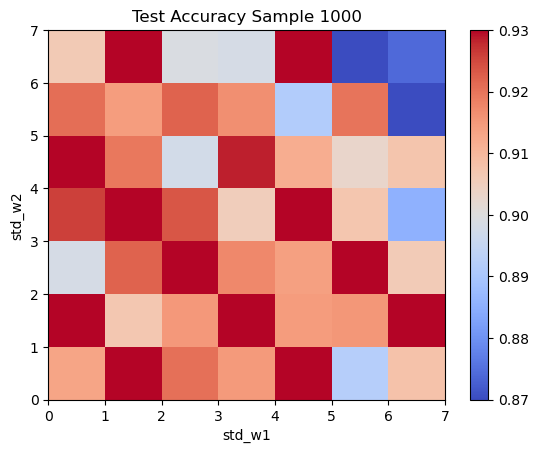

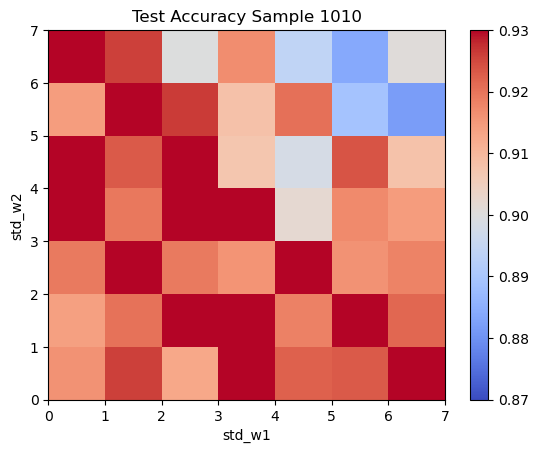

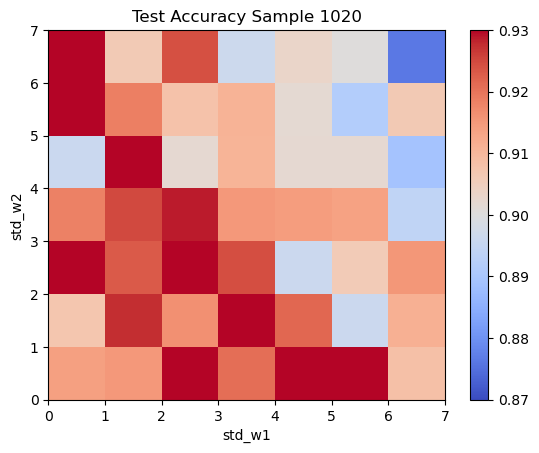

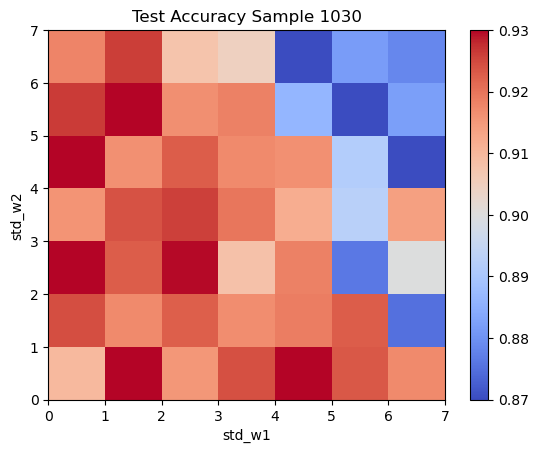

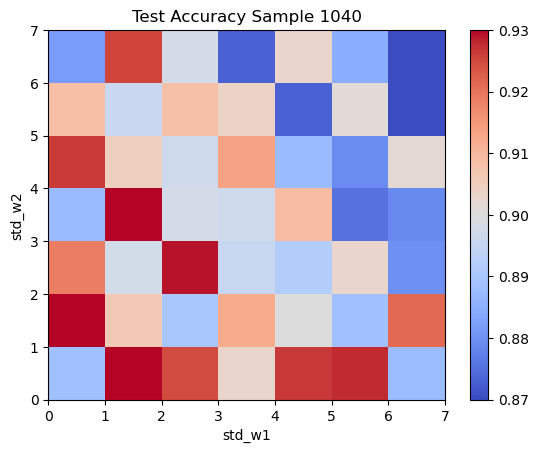

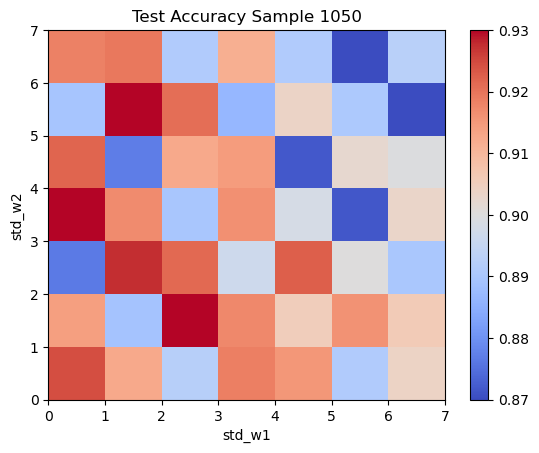

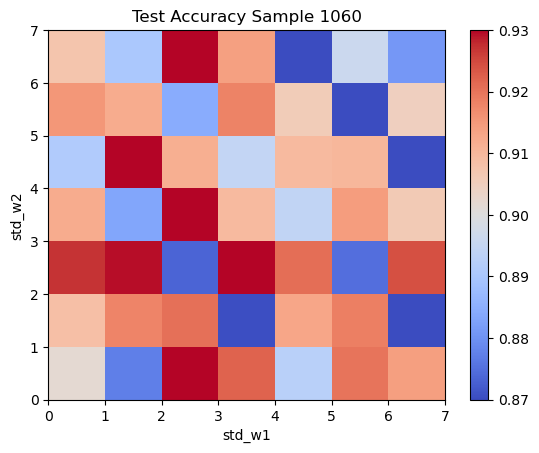

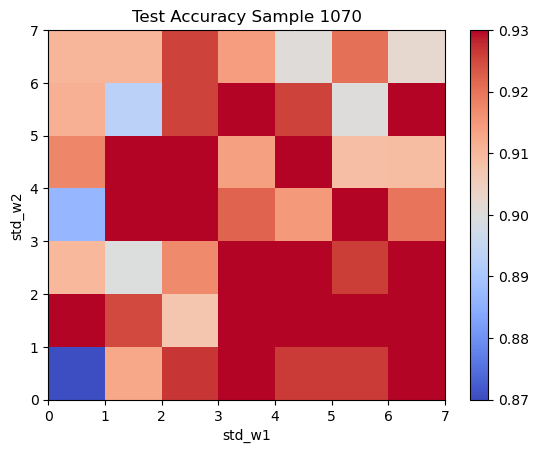

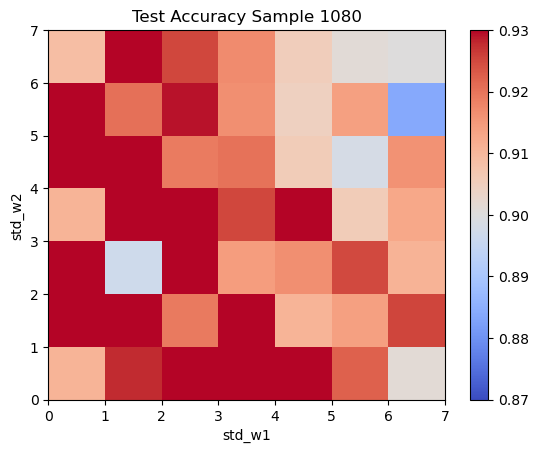

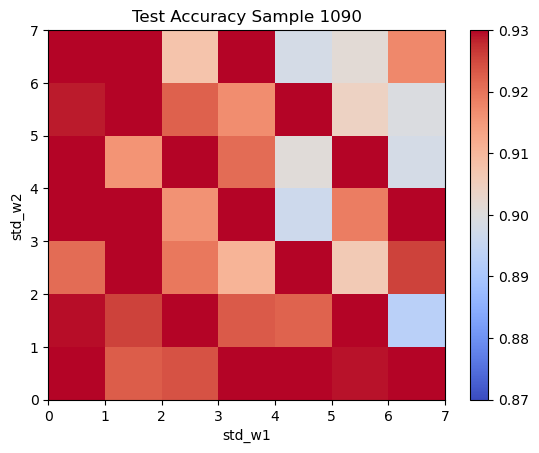

In [18]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    levels = np.linspace(0.87, 0.94, 10)
    b = ax.pcolormesh(data['test_accuracy_w1_w2'].T, cmap ='coolwarm', vmin=0.87, vmax=0.93)
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]
    index_max_accuracy = np.argmax(test_accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, test_accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(test_best_w1_best_w2)


In [19]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
std_dev_train_accuracy_grid_10_by_10_10_samples = np.std(train_accuracy_10_samples, axis=0)

In [20]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [21]:
train_accuracy_10_samples.shape

(10, 7, 7)

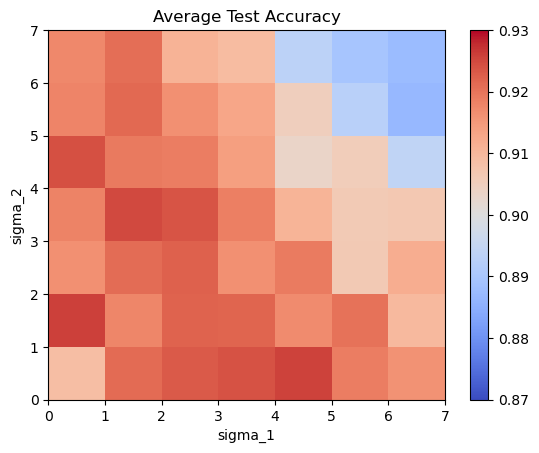

In [22]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(average_test_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', vmin= 0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_300_0.1.png".format(sample))

In [23]:
average_test_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_test_accuracy_grid_10_by_10_10_samples)

array([[False,  True, False, False, False, False, False],
       [False, False, False,  True, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [24]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_train_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_train_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_train_accuracy_grid_10_by_10_10_samples.shape)

In [25]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.90883413, 0.92582131, 0.91640625, 0.91813902, 0.92432893,
        0.91795873, 0.91744792],
       [0.92127404, 0.91758814, 0.92098357, 0.92498998, 0.91944111,
        0.92153446, 0.92078325],
       [0.92317708, 0.9220653 , 0.92230569, 0.92380809, 0.91887019,
        0.9163762 , 0.91096755],
       [0.92392829, 0.92188502, 0.91625601, 0.91867989, 0.91414263,
        0.91294071, 0.90935497],
       [0.92574119, 0.91696715, 0.91914063, 0.91077724, 0.90348558,
        0.904998  , 0.89333934],
       [0.91888021, 0.9202524 , 0.90638021, 0.90625   , 0.90546875,
        0.89253806, 0.88961338],
       [0.91596554, 0.90969551, 0.91175881, 0.90662059, 0.8940004 ,
        0.88684896, 0.88747997]])

In [26]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_test_accuracy_grid_10_by_10_10_samples.T)
index_max_accuracy = np.argmax(average_test_accuracy_grid_10_by_10_10_samples)
test_best_w1_w2 = np.unravel_index(index_max_accuracy, average_test_accuracy_grid_10_by_10_10_samples.shape)

In [27]:
test_best_w1_w2

(0, 1)

In [28]:
test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005

In [29]:
test_best_w1_best_w2

array([0.0125, 0.0275])

In [30]:
array = np.array([[0.0125, 0.0275],
[0.0125, 0.1025],
[0.0425, 0.0125],
[0.0275, 0.0125],
[0.0275, 0.0575],
[0.0275, 0.0875],
[0.0425, 0.0575],
[0.1025, 0.0425],
[0.0575, 0.0275],
[0.0425, 0.0275]])

In [31]:
for (i,element) in enumerate(array):
    data = {}
    data['frequency'] = 65
    data['N'] = 300
    data['accuracy'] = max_accuracy
    data['w1'] = element[0]/0.3445
    data['error_bar_w1'] = 0.0075/0.3445
    data['w2'] = element[1]/0.3445
    data['error_bar_w2'] = 0.0075/0.3445
    np.savez("test_accuracy_300_seed_{}.npz".format(i),**data)

In [32]:
data = {}
data['frequency'] = 65
data['N'] = 300
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("test_accuracy_300.npz",**data)